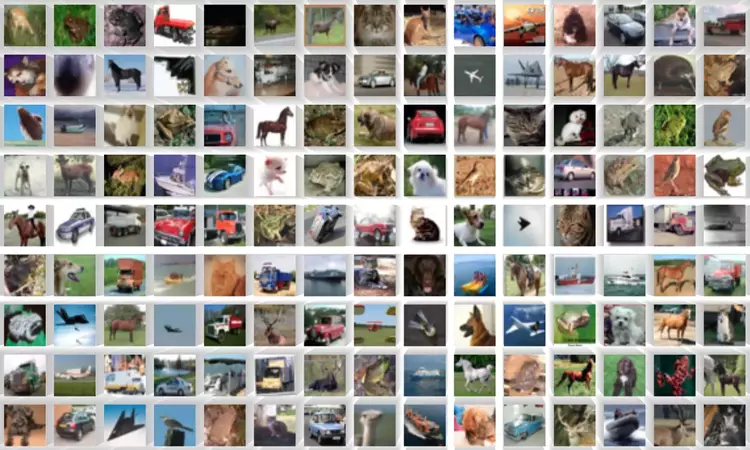

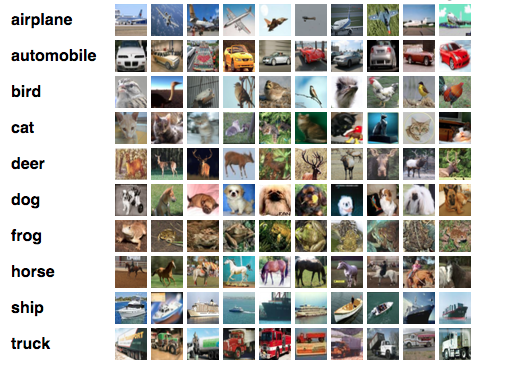

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

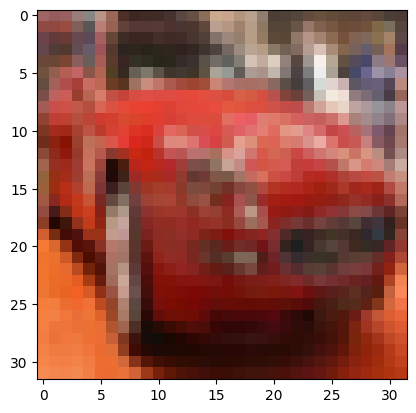

In [7]:
plt.imshow(X_train[5])

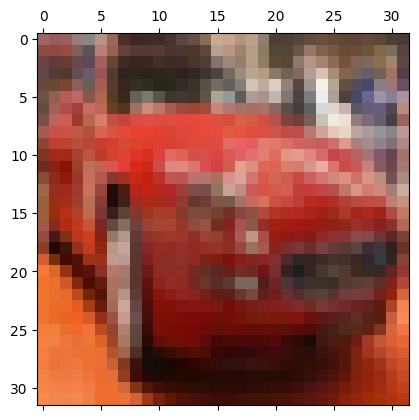

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\2666834997.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(y_train[3])]   # bunu indeksleyebiliyoruz.


'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\4201043552.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.


27679

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([15788, 36170, 12502, 27820, 41079, 48384,  5155, 13273, 45141,
       31591, 20806,  9659, 31627,  3161, 40377,  6329, 28705])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([ 9813,  2604, 38771,  2389, 16809, 14660, 23013, 48781, 42508,
       40974, 18728, 23867,  2799, 41858,  3646, 47155, 16289])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\2521659651.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor.


array([[[ 83, 122,  74],
        [ 36,  77,  40],
        [ 48,  89,  42],
        ...,
        [ 64, 113,  77],
        [ 69, 110,  78],
        [ 77, 116,  83]],

       [[ 79, 122,  77],
        [ 42,  91,  52],
        [ 43,  86,  44],
        ...,
        [ 59, 103,  73],
        [ 63, 105,  75],
        [ 68, 108,  76]],

       [[ 55,  99,  58],
        [ 42,  94,  57],
        [ 45,  84,  50],
        ...,
        [ 50,  89,  64],
        [ 52,  93,  66],
        [ 68, 108,  77]],

       ...,

       [[140, 159, 161],
        [134, 153, 156],
        [121, 140, 143],
        ...,
        [ 72,  90,  89],
        [104, 124, 126],
        [119, 137, 141]],

       [[143, 162, 165],
        [139, 158, 161],
        [137, 155, 158],
        ...,
        [122, 138, 137],
        [132, 152, 152],
        [138, 156, 159]],

       [[142, 160, 162],
        [138, 156, 158],
        [138, 156, 158],
        ...,
        [149, 165, 164],
        [147, 165, 165],
        [147, 165, 167]]

C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\4149529772.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))
C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\4149529772.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[rand_index])])


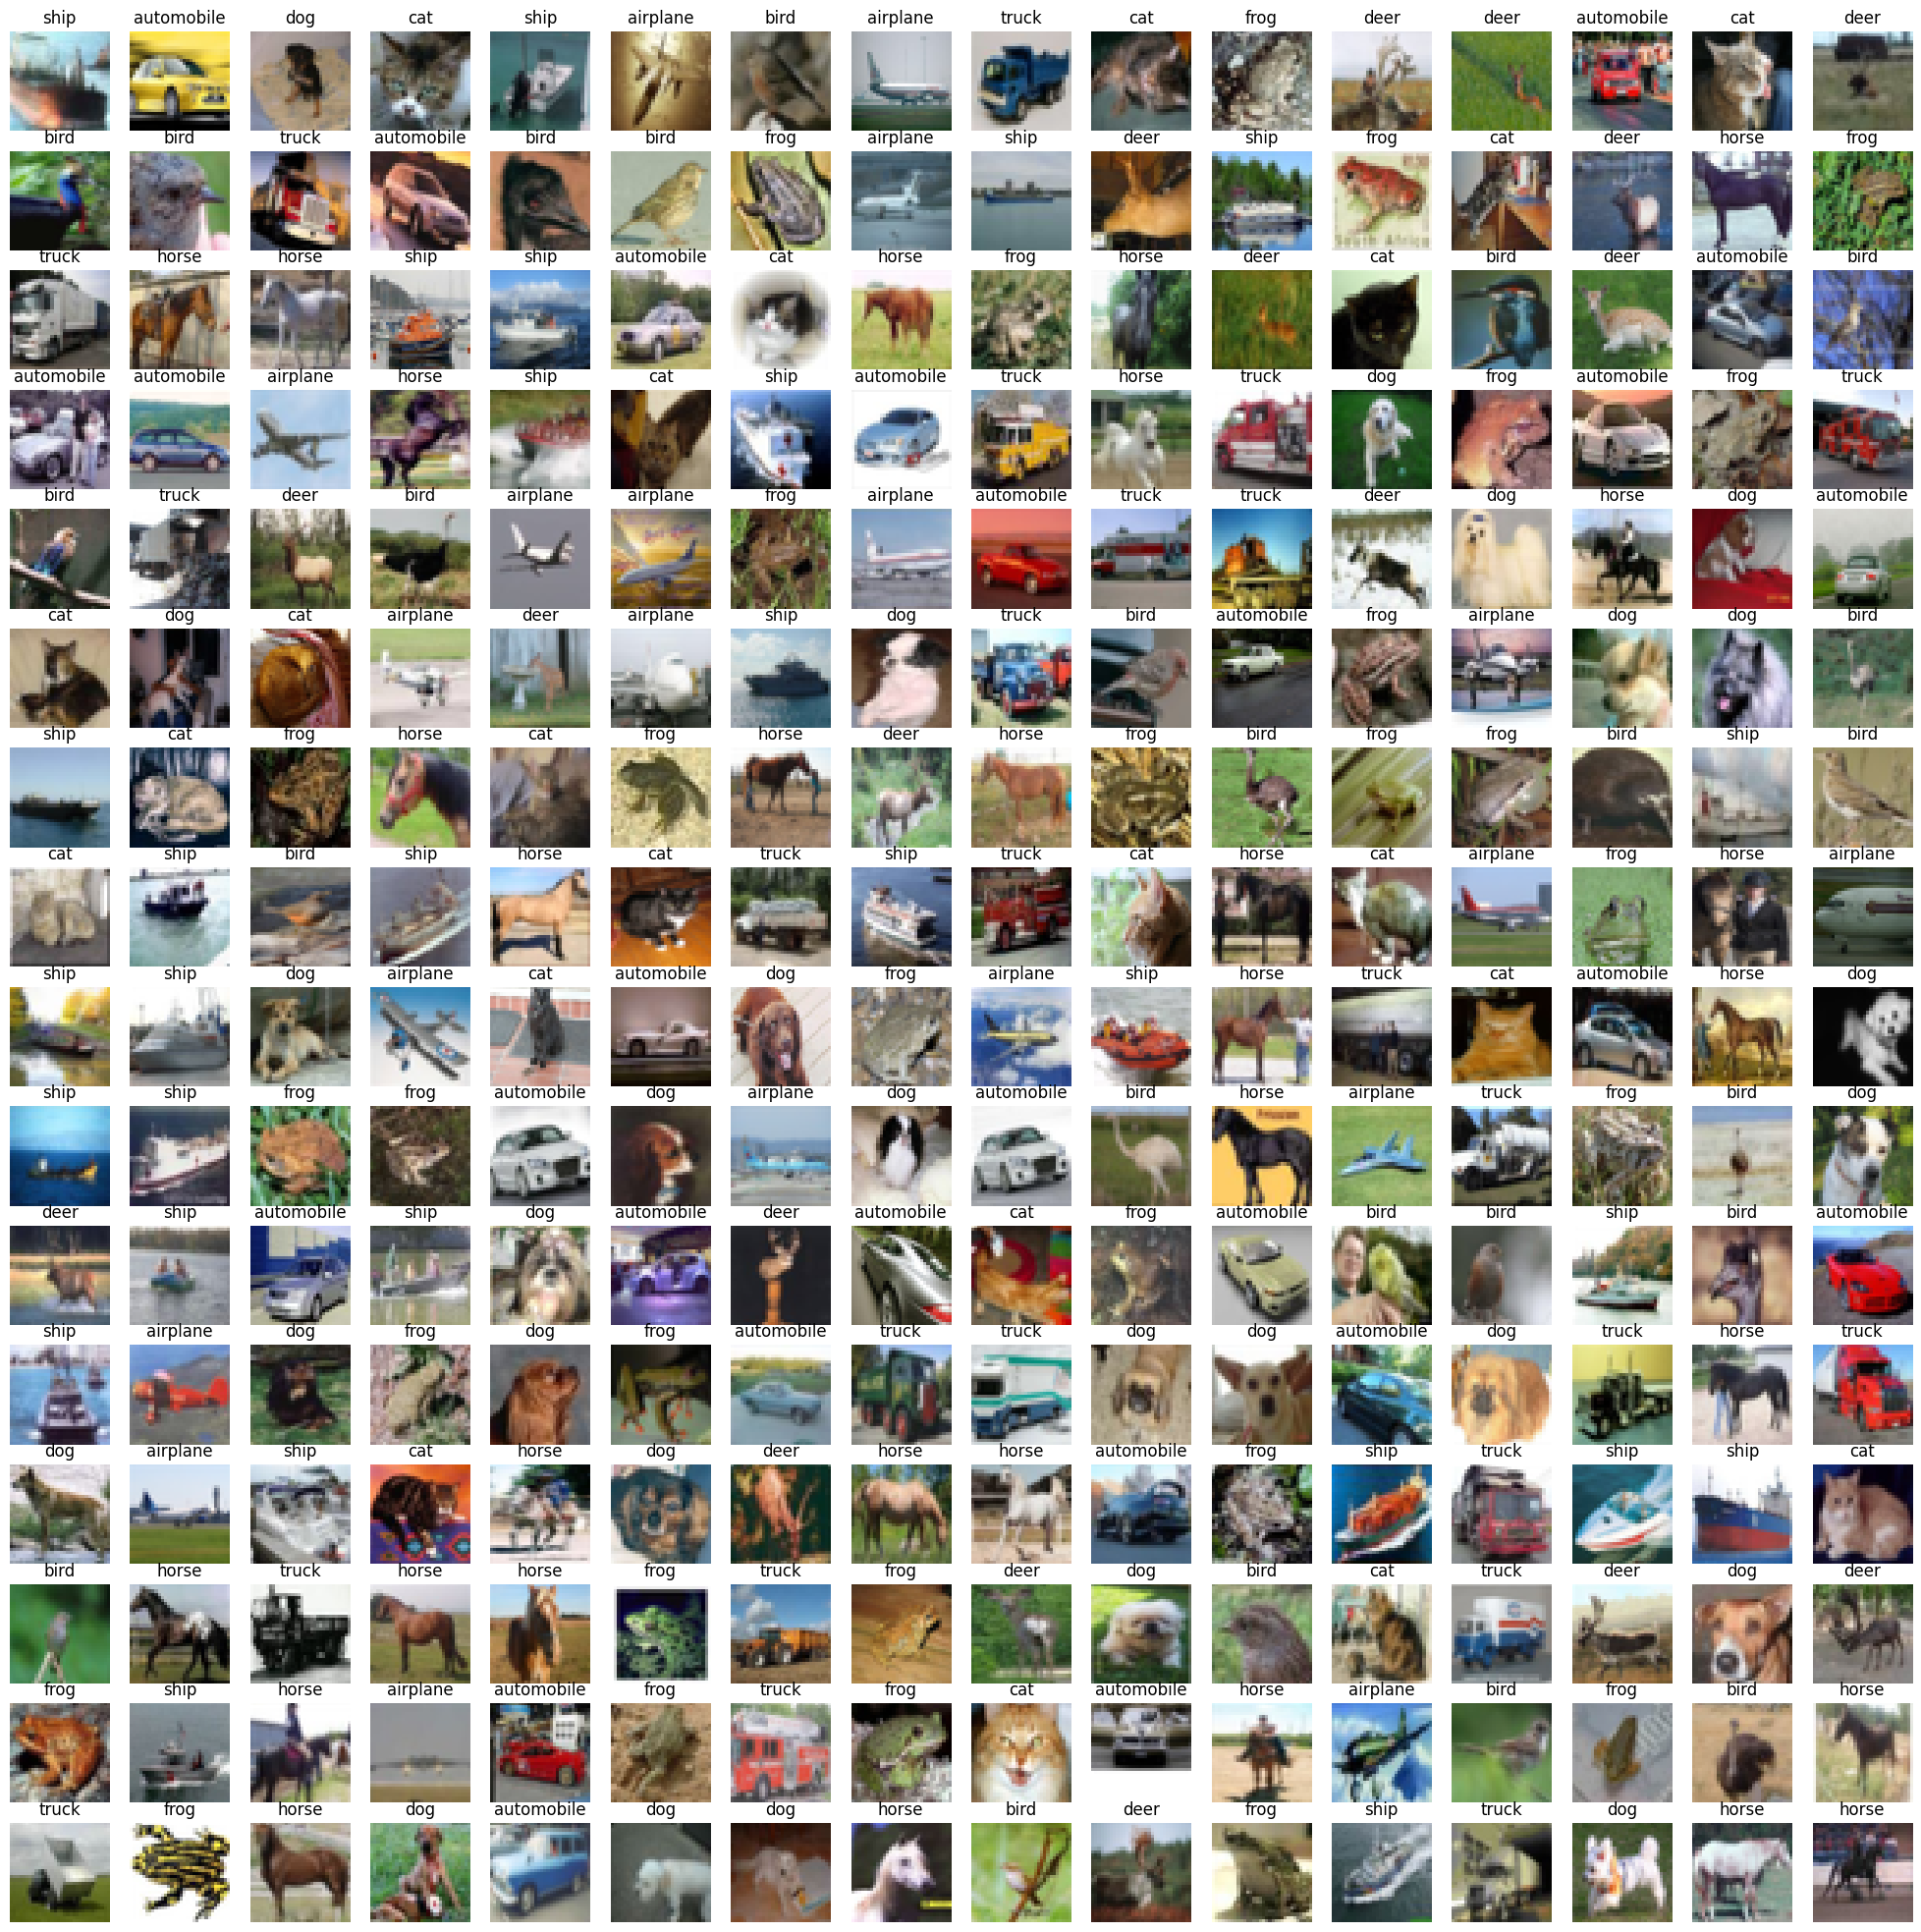

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

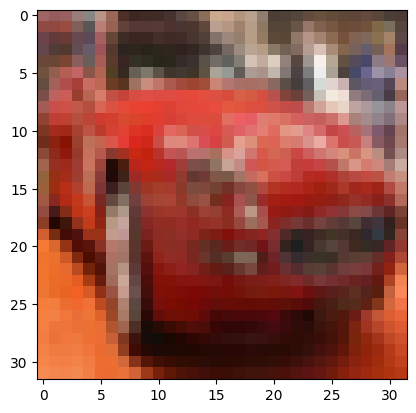

In [26]:
plt.imshow(X_train[5])

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

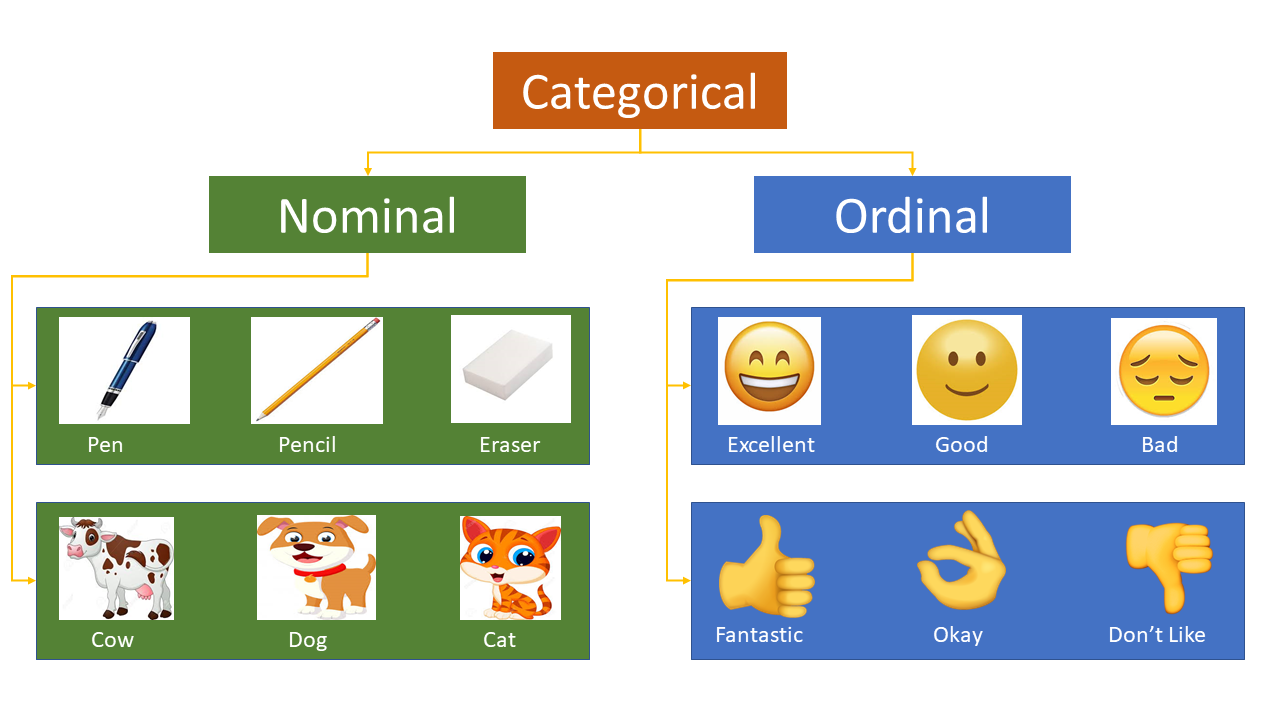

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 75ms/step - accuracy: 0.3788 - loss: 1.6999 - val_accuracy: 0.6212 - val_loss: 1.0808
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 78ms/step - accuracy: 0.6435 - loss: 1.0156 - val_accuracy: 0.6640 - val_loss: 0.9710
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.7105 - loss: 0.8283 - val_accuracy: 0.7023 - val_loss: 0.8558
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.7444 - loss: 0.7250 - val_accuracy: 0.7188 - val_loss: 0.8044
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.7753 - loss: 0.6315 - val_accuracy: 0.7240 - val_loss: 0.8253
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.8022 - loss: 0.5623 - val_accuracy: 0.7128 - val_loss: 0.8492
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.8215 - loss: 0.5033 - val_accuracy: 0.7181 - val_loss: 0.8825
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
model.history.history

{'accuracy': [0.4844599962234497,
  0.6558399796485901,
  0.711359977722168,
  0.7434999942779541,
  0.7707599997520447,
  0.7963600158691406,
  0.8172000050544739,
  0.8337399959564209,
  0.8560799956321716],
 'loss': [1.428092122077942,
  0.9806537628173828,
  0.8241933584213257,
  0.72763991355896,
  0.648197591304779,
  0.5762927532196045,
  0.5173863768577576,
  0.4640270471572876,
  0.4065913259983063],
 'val_accuracy': [0.6212000250816345,
  0.6639999747276306,
  0.7023000121116638,
  0.7188000082969666,
  0.7239999771118164,
  0.7128000259399414,
  0.7181000113487244,
  0.7275999784469604,
  0.7135999798774719],
 'val_loss': [1.0807867050170898,
  0.9709811806678772,
  0.8557725548744202,
  0.8044472336769104,
  0.8253060579299927,
  0.8491597175598145,
  0.8825036287307739,
  0.9197096228599548,
  0.9426007270812988]}

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.48446,1.428092,0.6212,1.080787
1,0.65584,0.980654,0.6640,0.970981
2,0.71136,0.824193,0.7023,0.855773
3,0.74350,0.727640,0.7188,0.804447
4,0.77076,0.648198,0.7240,0.825306


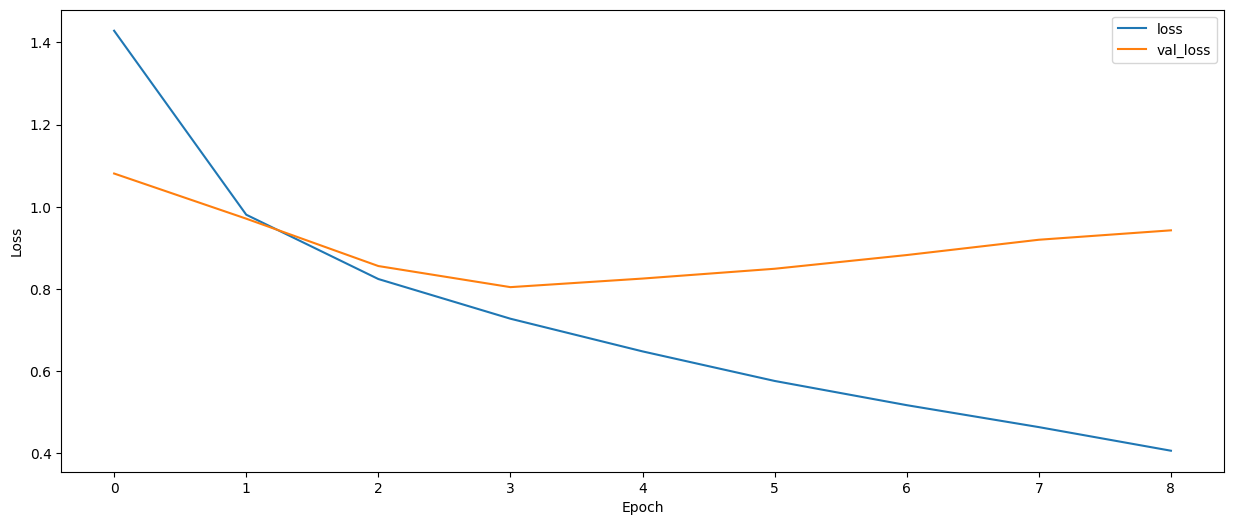

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

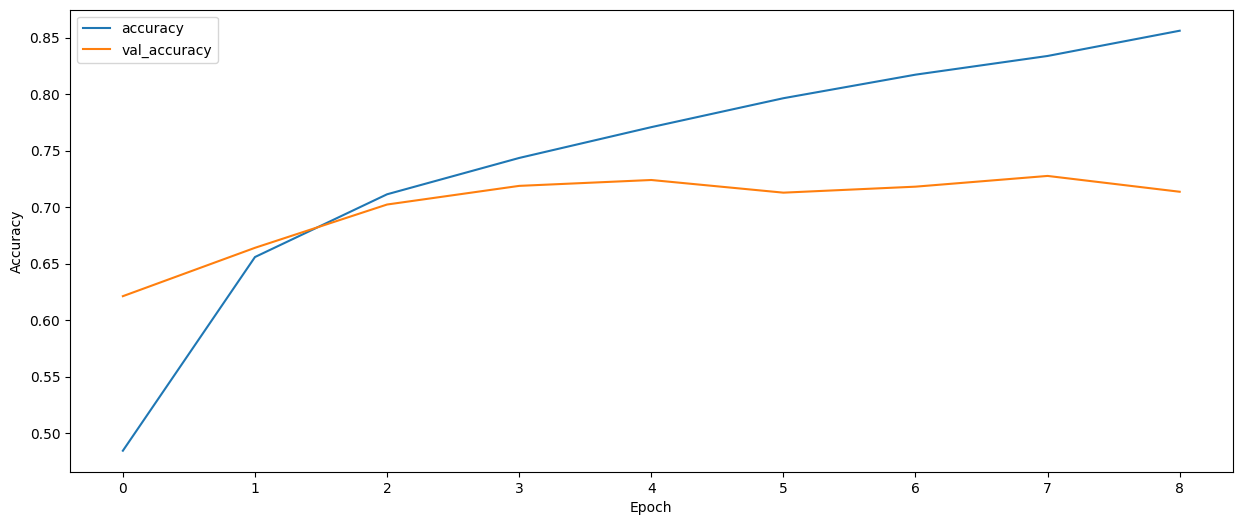

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7185 - loss: 0.9307
[0.9426007270812988, 0.7135999798774719]


In [43]:
preds = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [44]:
predictions = np.argmax(preds, axis=1)

In [45]:
predictions

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [46]:
print(classification_report(y_test, predictions))

NameError: name 'classification_report' is not defined

In [47]:
print(confusion_matrix(y_test, predictions))

NameError: name 'confusion_matrix' is not defined

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9426007270812988
Test accuracy: 0.7135999798774719


In [49]:
my_image = X_test[44]

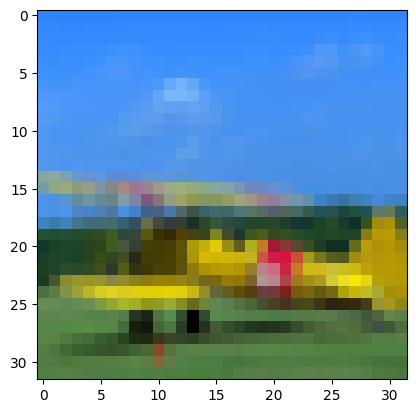

In [50]:
plt.imshow(my_image);

In [51]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [52]:
image_prediction

array([[9.9751019e-01, 2.7304745e-04, 5.0600640e-05, 1.7862060e-07,
        1.6185002e-05, 6.0757408e-08, 4.8553363e-07, 3.9173776e-07,
        2.4341885e-05, 2.1244010e-03]], dtype=float32)

In [53]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [54]:
result=np.argmax(image_prediction, axis=1)

In [55]:
result

array([0], dtype=int64)

In [56]:
classes[int(result)]

C:\Users\Yaramis\AppData\Local\Temp\ipykernel_10220\2708051357.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(result)]


'airplane'

In [ ]:
#model.save("cnn-2.h5")

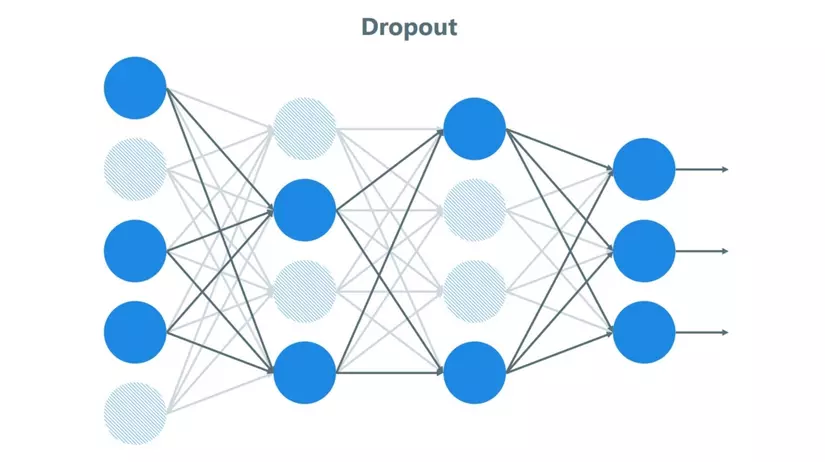

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [58]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701,706 (6.49 MB)

 Trainable params: 1,701,706 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 155ms/step - accuracy: 0.3801 - loss: 1.6892 - val_accuracy: 0.6178 - val_loss: 1.0990
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 242s 155ms/step - accuracy: 0.6227 - loss: 1.0607 - val_accuracy: 0.6937 - val_loss: 0.9056
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.6900 - loss: 0.8859 - val_accuracy: 0.7193 - val_loss: 0.8219
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.7267 - loss: 0.7750 - val_accuracy: 0.7293 - val_loss: 0.7724
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 232s 149ms/step - accuracy: 0.7579 - loss: 0.6908 - val_accuracy: 0.7378 - val_loss: 0.7476
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 250s 141ms/step - accuracy: 0.7779 - loss: 0.6298 - val_accuracy: 0.7481 - val_loss: 0.7200
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - accuracy: 0.7901 - loss: 0.5812 - val_accuracy: 0.7522 - val_loss: 0.7255
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/s

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8549843430519104
Test accuracy: 0.7663999795913696


In [62]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.83      0.92      0.87      1000
           2       0.74      0.62      0.68      1000
           3       0.57      0.57      0.57      1000
           4       0.76      0.73      0.74      1000
           5       0.64      0.67      0.65      1000
           6       0.83      0.84      0.83      1000
           7       0.81      0.83      0.82      1000
           8       0.88      0.84      0.86      1000
           9       0.83      0.86      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[815  21  41  22  15   4   5   7  39  31]
 [  8 918   4   6   1   1   3   5   9  45]
 [ 60   8 625  59  68  65  61  28  14  12]
 [ 23   8  45 573  42 178  57  37  16  21]
 [ 18   4  49  58 727  49  27  58   8   2]
 [ 15   3  27 180  33 669  11  38  11  13]
 [  4   9  22  49  33  29 837   5   8   4]
 [ 14   2  18  41  30  48   6 827   1  13]
 [ 49  42   8  10   4   2   2   8 840  35]
 [ 14  87   5   9   0   4   3   4  13 861]]


<Axes: >

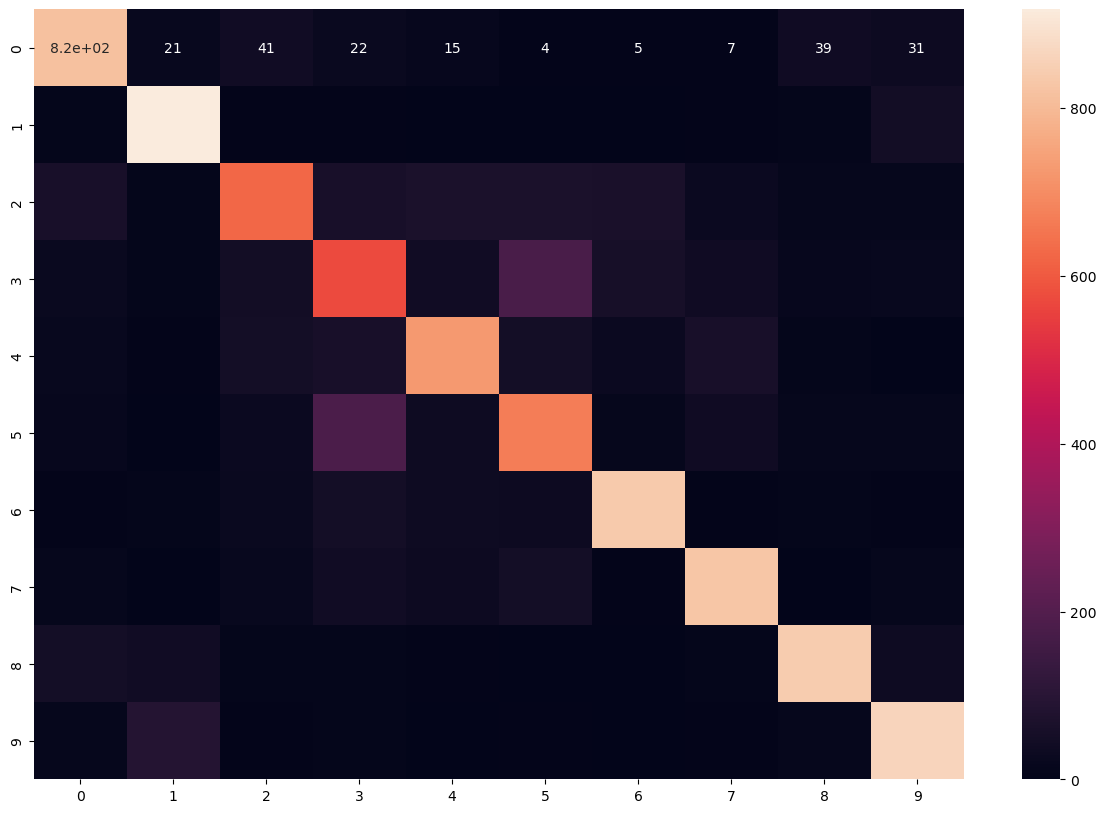

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

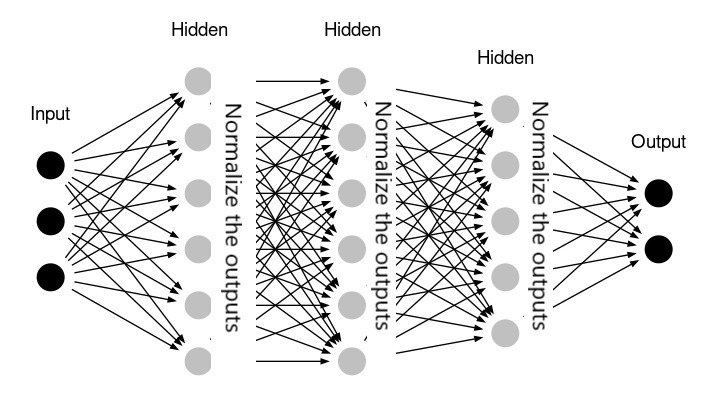

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 256)           │         590,0

 Total params: 1,474,218 (5.62 MB)

 Trainable params: 1,471,530 (5.61 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 120ms/step - accuracy: 0.3604 - loss: 1.9534 - val_accuracy: 0.6020 - val_loss: 1.1150
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.6606 - loss: 0.9799 - val_accuracy: 0.6546 - val_loss: 1.0502
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.7472 - loss: 0.7472 - val_accuracy: 0.7402 - val_loss: 0.7631
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 276s 155ms/step - accuracy: 0.7984 - loss: 0.6071 - val_accuracy: 0.7455 - val_loss: 0.7379
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 163ms/step - accuracy: 0.8360 - loss: 0.5011 - val_accuracy: 0.7811 - val_loss: 0.6464
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 168ms/step - accuracy: 0.8665 - loss: 0.4052 - val_accuracy: 0.8002 - val_loss: 0.6058
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.8953 - loss: 0.3192 - val_accuracy: 0.8214 - val_loss: 0.5499
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 169ms/s

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7673975229263306
Test accuracy: 0.8216999769210815


In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.92      0.90      0.91      1000
           2       0.78      0.71      0.74      1000
           3       0.69      0.67      0.68      1000
           4       0.82      0.81      0.82      1000
           5       0.78      0.71      0.74      1000
           6       0.80      0.92      0.85      1000
           7       0.91      0.81      0.86      1000
           8       0.88      0.91      0.89      1000
           9       0.84      0.91      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

